# Polarization reconstruction of SpiceCore events

### Feb 4, 2021

## Code

In [41]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

In [3]:
SpiceCore2 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh2_10.pkl")
len(SpiceCore2)

2170

In [4]:
depth_1224 = pd.read_csv("./plots/SpiceCorePolReco/A2_1224Depth.txt")
depth_1224.head()

,NZ_Time,depth
0,12:35,300
1,12:54,400
2,13:27,400
3,13:38,510
4,13:55,725


In [5]:
time = pd.to_datetime(depth_1224.NZ_Time)
# time = time.reindex(time)
# time = time.tz_localize('NZ').tz_convert("UTC")
time.head()
newTime = time.apply(lambda dt: dt.replace(day=24, month = 12, year = 2018))
# newTime#Still in NZ local time. Need to translate to UTC
df = pd.DataFrame(1, index=newTime, columns=['X'])
import pytz
nz = pytz.timezone('NZ')
utc = pytz.timezone('UTC')
df.index = df.index.tz_localize(nz).tz_convert(utc)
unixTimeDepth = (df.index - pd.Timestamp("1970-01-01").tz_localize(utc)) // pd.Timedelta('1s')#This is unix time 

## Events debugging

(0, 30)

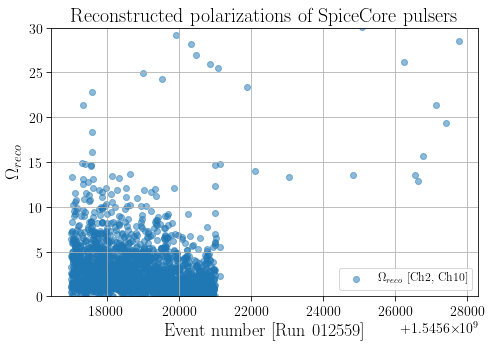

In [6]:
plt.figure(figsize=(7,5))
# plt.scatter(SpiceCore0., SpiceCore0.Omega_reco, alpha = 0.5, label = "$\Omega_{reco}$ [Ch0, Ch8]")
# plt.scatter(SpiceCore1.EvNum, SpiceCore1.Omega_reco, alpha = 0.5, label = "$\Omega_{reco}$ [Ch1, Ch9]")
plt.scatter(SpiceCore2.unixtime, SpiceCore2.Omega_reco, alpha = 0.5, label = "$\Omega_{reco}$ [Ch2, Ch10]")
# plt.hist2d(SpiceCore2.EvNum, SpiceCore2.Omega_reco, bins = 100)
# plt.colorbar()
# plt.axhline(mean, linestyle = "--", color = "C1", lw = 2, label = "Mean = %0.2f"%mean)
plt.legend()
plt.grid()
plt.ylabel("$\Omega_{reco}$")
plt.xlabel("Event number [Run 012559]")
plt.title("Reconstructed polarizations of SpiceCore pulsers")
plt.tight_layout()
plt.ylim(0,30)
# plt.xlim(0,30000)

# plt.savefig(my_path_plots+'/SpiceCorePolReco/Hist2DOmegaReco_SpiceCore_run012559.png', dpi=250)


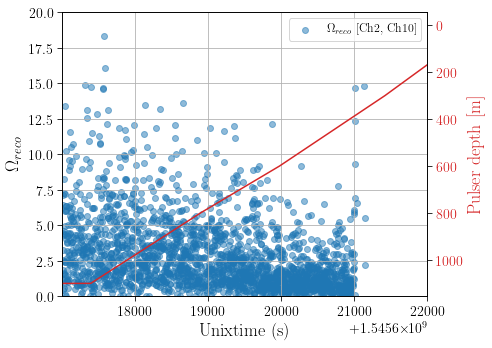

In [39]:
fig, ax1 = plt.subplots(figsize=(7,5))

# color = 'tab:k'
ax1.set_xlabel('Unixtime (s)')
ax1.set_ylabel("$\Omega_{reco}$")
ax1.scatter(SpiceCore2.unixtime, SpiceCore2.Omega_reco, alpha = 0.5, label = "$\Omega_{reco}$ [Ch2, Ch10]")
ax1.tick_params(axis='y')
ax1.grid()
ax1.set_xlim(min(SpiceCore2.unixtime),2.2*1E4+1.5456*1E9)
ax1.set_ylim(0,20)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Pulser depth [m]', color=color)  # we already handled the x-label with ax1
ax2.plot(unixTimeDepth, depth_1224.depth, color=color, label = "SpiceCore depth")
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()

# plt.legend()
plt.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(my_path_plots+'/SpiceCorePolReco/Hist2DOmegaReco_SpiceCore_run012559.png', dpi=250)


## Expected polarization 

In [58]:
rt = pyrex.RayTracer(from_point=(0, 0, -1000), to_point=(2400, 0, -179.93))
# rt = pyrex.RayTracer(from_point=(9947.11,7599.82,-1477.45), to_point=(1.0e+04, 1.0e+04, -2.9e+02))


In [65]:
path = rt.solutions[0]
path2 = rt.solutions[1]

In [66]:
theta_d=np.degrees(np.arccos(path.received_direction[2])-np.pi/2)
theta_r=np.degrees(np.arccos(path2.received_direction[2])-np.pi/2)

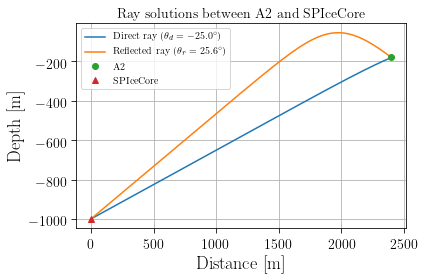

In [67]:
fig, ax1 = plt.subplots(figsize=(6,4))

plt.plot(path.coordinates[0],path.coordinates[2], label="Direct ray ($\\theta_d =%0.1f^\circ$)"% -25)
plt.plot(path2.coordinates[0],path2.coordinates[2], label="Reflected ray ($\\theta_r =%0.1f^\circ$)"% theta_r)
plt.plot(2400, -179.93,"o", label="A2")
plt.plot(0, -1000, "^", label="SPIceCore")
plt.legend()
plt.ylabel("Depth [m]")
plt.xlabel("Distance [m]")
plt.grid()
plt.title("Ray solutions between A2 and SPIceCore", fontsize=14)
plt.tight_layout()
plt.savefig(my_path_plots+'/SpiceCorePolReco/A2_SPIceCore.png', dpi=250)

# plt.savefig("./A2_SPIceCore.png", dpi=250)

In [68]:
path.emitted_direction

array([0.94401224, 0.        , 0.32991044])

In [71]:
90-np.degrees(np.arccos(path.emitted_direction[2]))

19.263339501863783